In [1]:
from ngsolve.webgui import Draw

import numpy as np
import ngsolve as ngs

motor_npz = np.load('motor_pizza.npz', allow_pickle = True)

geoOCC = motor_npz['geoOCC'].tolist()
m = motor_npz['m']; m_new = m
j3 = motor_npz['j3']

geoOCCmesh = geoOCC.GenerateMesh()
mesh = ngs.Mesh(geoOCCmesh)
mesh.Refine()

In [2]:
HCurl = ngs.HCurl(mesh, order = 2, nograds = True, dirichlet = 'left|right|stator_outer')
# HCurl = ngs.HCurl(mesh, order = 2, nograds = True)

u,v = HCurl.TnT()

K = ngs.BilinearForm(HCurl)
# K += (ngs.curl(u)*ngs.curl(v)+1e-5*u*v)*ngs.dx
K += (ngs.curl(u)*ngs.curl(v)+0*u*v)*ngs.dx
K.Assemble()

f = ngs.LinearForm(HCurl)
f += ngs.InnerProduct(ngs.CF(ngs.x**2),ngs.curl(v))*ngs.dx
f.Assemble()

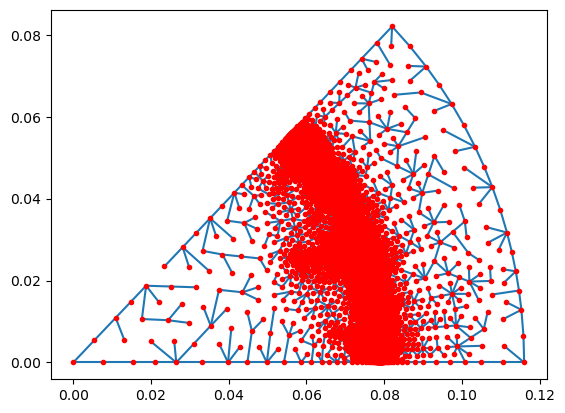

In [3]:
from ngcotree import *
newFreeDofs = CoTreeBitArray(mesh, HCurl, plot = True)

In [4]:
A = ngs.GridFunction(HCurl)
A.vec.data = K.mat.Inverse(freedofs = newFreeDofs, inverse = 'sparsecholesky')*f.vec
# A.vec.data = K.mat.Inverse(HCurl.FreeDofs(), inverse = 'sparsecholesky')*f.vec

Draw(A, vectors={"grid_size":100})
Draw(ngs.curl(A), mesh)
A.vec.data.FV().NumPy().max()

ngs.Integrate(ngs.curl(A),mesh)

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

3.3897409138025584e-21